*Copyright 2024 Jaeyoung Chun*

You may not make copies of this and use or distribute it for any purpose.

# Game Replay using Tracking Data

In [1]:
from kloppy import metrica
import matplotlib.pyplot as plt
from mplsoccer import Pitch
import os
from tqdm import tqdm

## Load Tracking Data

In [2]:
dataset = metrica.load_open_data(match_id=1)

In [3]:
len(dataset.records)

145006

In [4]:
dataset.records[0].timestamp

0.0

In [5]:
dataset.records[-1].timestamp

2949.4799999999996

## Metadata

In [6]:
metadata = dataset.metadata

### Home Team and Away Team

In [7]:
team_home, team_away = metadata.teams

### Players

In [8]:
for player in team_home.players:
    print(player.player_id)

home_11
home_1
home_2
home_3
home_4
home_5
home_6
home_7
home_8
home_9
home_10
home_12
home_13
home_14


### Frames

In [9]:
len(dataset.frames)

145006

In [10]:
# first ten frames
dataset.frames[:10]

[<Frame>,
 <Frame>,
 <Frame>,
 <Frame>,
 <Frame>,
 <Frame>,
 <Frame>,
 <Frame>,
 <Frame>,
 <Frame>]

### Ball Coordinates

In [11]:
for frame in dataset.frames[:10]:
    print(frame.ball_coordinates)

Point(x=0.45472, y=0.6129100000000001)
Point(x=0.49645, y=0.59344)
Point(x=0.53716, y=0.5744400000000001)
Point(x=0.55346, y=0.57769)
Point(x=0.55512, y=0.5943)
Point(x=0.55677, y=0.6109100000000001)
Point(x=0.55842, y=0.6275200000000001)
Point(x=0.56004, y=0.64371)
Point(x=0.56173, y=0.66074)
Point(x=0.56338, y=0.67735)


### Player Coordinates

In [12]:
for frame in dataset.frames[:10]:
    for player, coord in frame.players_coordinates.items():
        if player.team.name == "Home":
            print(player.player_id, coord)

home_11 Point(x=0.00082, y=0.51762)
home_1 Point(x=0.32648, y=0.34678)
home_2 Point(x=0.33701, y=0.51137)
home_3 Point(x=0.30927, y=0.64471)
home_4 Point(x=0.32137, y=0.78738)
home_5 Point(x=0.41094, y=0.27410999999999996)
home_6 Point(x=0.41698, y=0.52157)
home_7 Point(x=0.39125, y=0.6745)
home_8 Point(x=0.45388, y=0.78826)
home_9 Point(x=0.52697, y=0.6202)
home_10 Point(x=0.55243, y=0.56731)
home_11 Point(x=0.00096, y=0.51762)
home_1 Point(x=0.32648, y=0.34678)
home_2 Point(x=0.33701, y=0.51137)
home_3 Point(x=0.30927, y=0.64471)
home_4 Point(x=0.32137, y=0.78738)
home_5 Point(x=0.41094, y=0.27410999999999996)
home_6 Point(x=0.41698, y=0.52157)
home_7 Point(x=0.39125, y=0.6745)
home_8 Point(x=0.45388, y=0.78826)
home_9 Point(x=0.52697, y=0.6202)
home_10 Point(x=0.55243, y=0.56731)
home_11 Point(x=0.00114, y=0.51762)
home_1 Point(x=0.32648, y=0.34678)
home_2 Point(x=0.33701, y=0.51137)
home_3 Point(x=0.30927, y=0.64471)
home_4 Point(x=0.32137, y=0.78738)
home_5 Point(x=0.41094, y=0.27

## Visualization

### Pitch

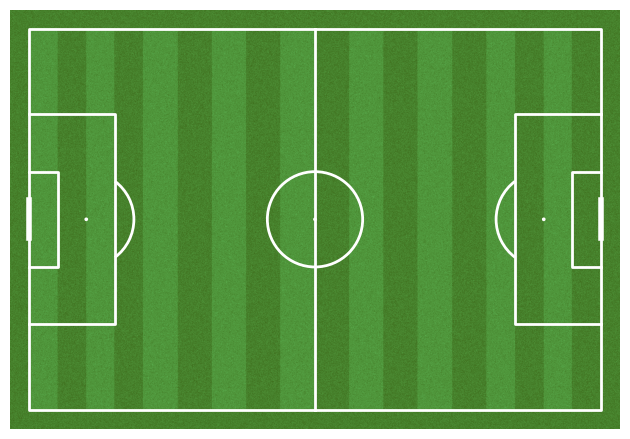

In [13]:
pitch = Pitch(
    pitch_color="grass",
    line_color="white",
    stripe=True
)

fig, ax = pitch.draw()

plt.show()

### First Frame

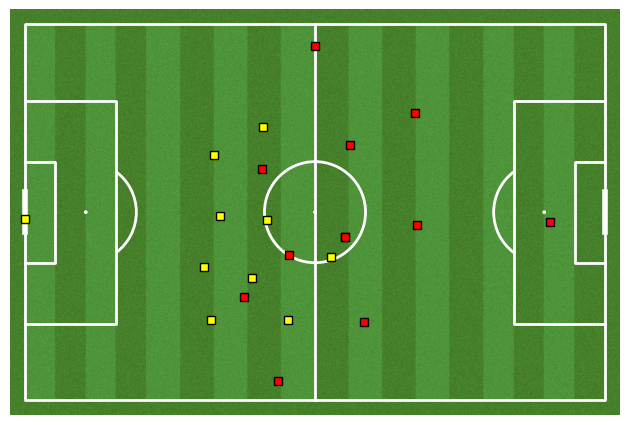

In [14]:
pitch = Pitch(
    pitch_type="metricasports",
    pitch_width=68, pitch_length=105,
    pitch_color="grass",
    line_color="white",
    stripe=True
)

fig, ax = pitch.draw()

# the very first frame
frame = dataset.frames[0]

for player, coord in frame.players_coordinates.items():
    if player.team.name == "Home":
        pitch.plot(coord.x, coord.y, marker="s", color="yellow", markeredgecolor="black", zorder=1, ax=ax)
    else:
        pitch.plot(coord.x, coord.y, marker="s", color="red", markeredgecolor="black", zorder=1, ax=ax)

plt.show()

### First 50 Frames

#### Players

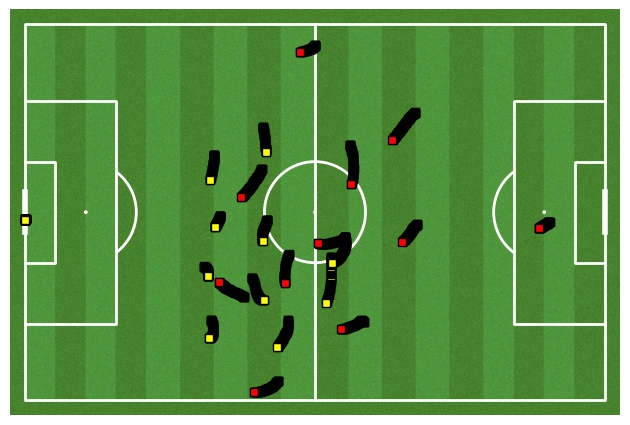

In [15]:
pitch = Pitch(
    pitch_type="metricasports",
    pitch_width=68, pitch_length=105,
    pitch_color="grass",
    line_color="white",
    stripe=True
)

fig, ax = pitch.draw()

for frame in dataset.frames[:50]:
    for player, coord in frame.players_coordinates.items():
        if player.team.name == "Home":
            pitch.plot(coord.x, coord.y, marker="s", color="yellow", markeredgecolor="black", zorder=1, ax=ax)
        else:
            pitch.plot(coord.x, coord.y, marker="s", color="red", markeredgecolor="black", zorder=1, ax=ax)

plt.show()

#### Players and the Ball

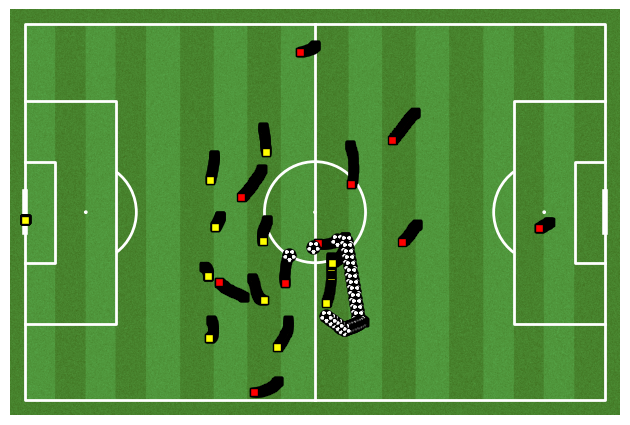

In [16]:
pitch = Pitch(
    pitch_type="metricasports",
    pitch_width=68, pitch_length=105,
    pitch_color="grass",
    line_color="white",
    stripe=True
)

fig, ax = pitch.draw()

for frame in dataset.frames[:50]:

    pitch.scatter(
        frame.ball_coordinates.x,
        frame.ball_coordinates.y,
        marker="football", s=100,
        zorder=999,
        ax=ax
    )
    
    for player, coord in frame.players_coordinates.items():
        if player.team.name == "Home":
            pitch.plot(coord.x, coord.y, marker="s", color="yellow", markeredgecolor="black", zorder=1, ax=ax)
        else:
            pitch.plot(coord.x, coord.y, marker="s", color="red", markeredgecolor="black", zorder=1, ax=ax)

plt.show()

## Convert to DataFrame

In [17]:
df = dataset.to_df(engine="pandas")

In [18]:
df

,period_id,timestamp,frame_id,ball_state,ball_owning_team_id,ball_x,ball_y,ball_z,ball_speed,home_11_x,...,home_13_d,home_13_s,away_28_x,away_28_y,away_28_d,away_28_s,home_14_x,home_14_y,home_14_d,home_14_s
0,1,0.00,1,None,None,0.45472,0.61291,None,None,0.00082,...,None,None,NaN,NaN,None,None,NaN,NaN,None,None
1,1,0.04,2,None,None,0.49645,0.59344,None,None,0.00096,...,None,None,NaN,NaN,None,None,NaN,NaN,None,None
2,1,0.08,3,None,None,0.53716,0.57444,None,None,0.00114,...,None,None,NaN,NaN,None,None,NaN,NaN,None,None
3,1,0.12,4,None,None,0.55346,0.57769,None,None,0.00121,...,None,None,NaN,NaN,None,None,NaN,NaN,None,None
4,1,0.16,5,None,None,0.55512,0.59430,None,None,0.00129,...,None,None,NaN,NaN,None,None,NaN,NaN,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145001,2,2949.32,145002,None,None,NaN,NaN,None,None,0.90614,...,None,None,0.21798,0.18921,None,None,0.34157,0.35402,None,None
145002,2,2949.36,145003,None,None,NaN,NaN,None,None,0.90550,...,None,None,0.21798,0.18921,None,None,0.34127,0.35417,None,None
145003,2,2949.40,145004,None,None,NaN,NaN,None,None,0.90492,...,None,None,0.21798,0.18921,None,None,0.34089,0.35431,None,None
145004,2,2949.44,145005,None,None,NaN,NaN,None,None,0.90456,...,None,None,0.21798,0.18921,None,None,0.34056,0.35448,None,None


## Animation

### FFmpeg

```
conda activate facamp
conda install conda-forge::ffmpeg
```

### First 100 Frames

#### Create Frame Images

In [19]:
path_base = "anim1a"

In [20]:
os.makedirs(path_base, exist_ok=True)

In [21]:
pitch = Pitch(
    pitch_type="metricasports",
    pitch_width=68, pitch_length=105,
    pitch_color="grass",
    line_color="white",
    stripe=True
)


n = 0
max_frames = 100

for frame in tqdm(dataset.frames[:max_frames]):

    n += 1
    
    fig, ax = pitch.draw()

    pitch.scatter(
        frame.ball_coordinates.x,
        frame.ball_coordinates.y,
        marker="football", s=100,
        zorder=999,
        ax=ax
    )
    
    for player, coord in frame.players_coordinates.items():
        if player.team.name == "Home":
            pitch.plot(coord.x, coord.y, marker="s", color="yellow", markeredgecolor="black", zorder=1, ax=ax)
        else:
            pitch.plot(coord.x, coord.y, marker="s", color="red", markeredgecolor="black", zorder=1, ax=ax)

    path_dst = os.path.join(path_base, f"{n:03d}.png")
    plt.savefig(path_dst)

    # clean up
    fig.clear()
    plt.close(fig)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:31<00:00,  3.15it/s]


#### Convert Images to Video

**Mac**

```
ffmpeg -framerate 30 -pattern_type glob -i 'anim1a/*.png' -c:v libx264 -pix_fmt yuv420p anim1a.mp4
```

**Windows**

```
ffmpeg -framerate 30 -i anim1a/%03d.png -c:v libx264 -pix_fmt yuv420p anim1a.mp4
```

### First 3,500 Frames

#### Create Frame Images

In [22]:
path_base = "anim1b"

In [23]:
os.makedirs(path_base, exist_ok=True)

In [24]:
pitch = Pitch(
    pitch_type="metricasports",
    pitch_width=68, pitch_length=105,
    pitch_color="grass",
    line_color="white",
    stripe=True
)

n = 0
max_frames = 3500

for frame in tqdm(dataset.frames[:max_frames]):

    n += 1
    
    fig, ax = pitch.draw()

    if frame.ball_coordinates is not None:
        pitch.scatter(
            frame.ball_coordinates.x,
            frame.ball_coordinates.y,
            marker="football", s=100,
            zorder=999,
            ax=ax
        )
    
    for player, coord in frame.players_coordinates.items():
        if player.team.name == "Home":
            pitch.plot(coord.x, coord.y, marker="s", color="yellow", markeredgecolor="black", zorder=1, ax=ax)
        else:
            pitch.plot(coord.x, coord.y, marker="s", color="red", markeredgecolor="black", zorder=1, ax=ax)
            
    path_dst = os.path.join(path_base, f"{n:06d}.png")
    plt.savefig(path_dst)

    # clean up
    fig.clear()
    plt.close(fig)

100%|██████████████████████████████████████████████████████████████████████████████| 3500/3500 [18:13<00:00,  3.20it/s]


#### Convert Images to Video

**Mac**

```
ffmpeg -framerate 30 -pattern_type glob -i 'anim1b/*.png' -c:v libx264 -pix_fmt yuv420p anim1b.mp4
```

**Windows**

```
ffmpeg -framerate 30 -i anim1b/%06d.png -c:v libx264 -pix_fmt yuv420p anim1b.mp4
```